<a href="https://colab.research.google.com/github/NicoleLund/flight_delay_prediction/blob/model_prep_210819/data_manipulation_modeling/investigate_models/b_random_forest_all_y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# b_random_forest_delays_dec_hrs
----

Written in Google Colab

By Nicole Lund 

This workbook builds a random forest model for 2017 flight performance.

In [1]:
# Import Dependencies

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt

# Data manipulation
import numpy as np
import pandas as pd
from statistics import mean
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Parameter Selection
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Model Development
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Model Metrics
from sklearn.metrics import classification_report

# Save/load files
from tensorflow.keras.models import load_model
import joblib

# # Ignore deprecation warnings
# import warnings
# warnings.simplefilter('ignore', FutureWarning)

In [2]:
# Set the seed value for the notebook, so the results are reproducible
from numpy.random import seed
seed(1)

# Read in the csv model files

In [3]:
# # Read the CSV files from AWS to Pandas Dataframe
# X_train = pd.read_csv("https://flight-delay-prediction.s3.us-west-1.amazonaws.com/2017_TUS_X_train.csv")
# X_test = pd.read_csv("https://flight-delay-prediction.s3.us-west-1.amazonaws.com/2017_TUS_X_test.csv")
# y_train = pd.read_csv("https://flight-delay-prediction.s3.us-west-1.amazonaws.com/2017_TUS_y_train.csv")
# y_test = pd.read_csv("https://flight-delay-prediction.s3.us-west-1.amazonaws.com/2017_TUS_y_test.csv")

In [19]:
# Read the CSV files from AWS to Pandas Dataframe
X_train = pd.read_csv("../feature_assessment/2017_TUS_X_train_dec_hrs.csv")
X_test = pd.read_csv("../feature_assessment/2017_TUS_X_test_dec_hrs.csv")
y_train = pd.read_csv("../feature_assessment/2017_TUS_y_train_dec_hrs.csv")
y_test = pd.read_csv("../feature_assessment/2017_TUS_y_test_dec_hrs.csv")

In [20]:
X_train.drop('CRS_ARR_hours',axis=1)

,OP_CARRIER_FL_NUM,CRS_DEP_hours,DISTANCE,DL,OO,UA,WN,AA,EV,AS,...,MSP,OAK,ORD,PDX,PHX,SAN,SEA,SFO,SJC,SLC
0,5538,11.333333,1437,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5538,12.316667,1437,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2068,16.416667,1440,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1251,5.083333,451,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4769,11.500000,601,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10779,4220,10.350000,936,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10780,641,15.583333,1216,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10781,5525,7.416667,936,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10782,846,7.416667,639,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X_train.head(3)

,OP_CARRIER_FL_NUM,CRS_DEP_hours,CRS_ARR_hours,DISTANCE,DL,OO,UA,WN,AA,EV,...,MSP,OAK,ORD,PDX,PHX,SAN,SEA,SFO,SJC,SLC
0,5538,11.333333,16.783333,1437,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5538,12.316667,16.833333,1437,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2068,16.416667,20.666667,1440,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y_train = y_train.DELAY
y_test = y_test.DELAY

In [23]:
y_train.head(3)

0    0
1    0
2    0
Name: DELAY, dtype: int64

## Random Forest Classifier Method

In [24]:
# Create model
model = RandomForestClassifier(n_estimators=1000)
model = model.fit(X_train, y_train)

In [25]:
# Sort the features by their importance
tree_feature_sort = sorted(zip(X_train.columns,model.feature_importances_),key=itemgetter(1), reverse=True)
# tree_feature_sort

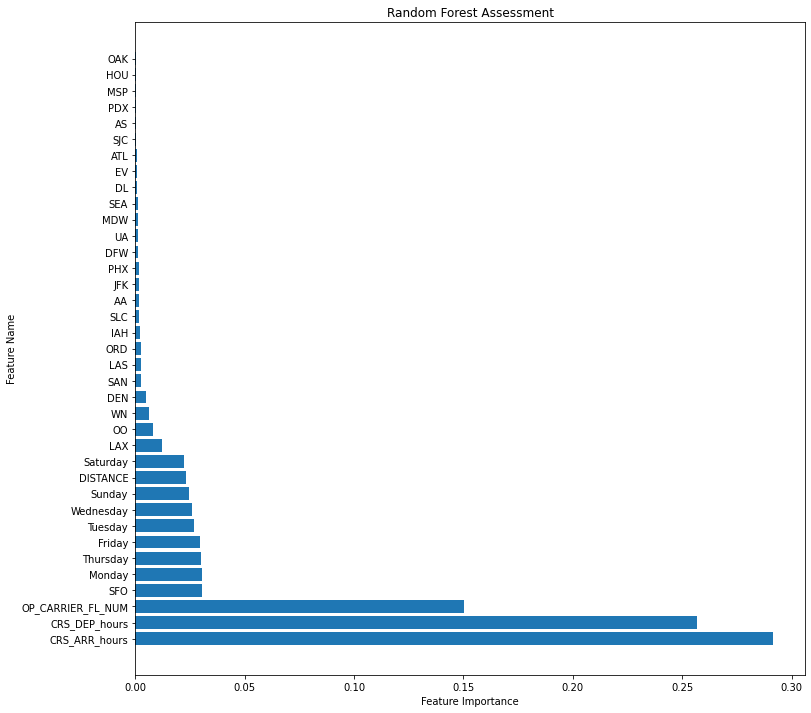

In [26]:
# Plot Decision Tree Feature Importance
fig = plt.figure(figsize=[12,12])
plt.barh(*zip(* (tree_feature_sort)))
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Assessment')
plt.show()

# Score Model

In [27]:
print('Random Forest Score:')
model.score(X_test, y_test)

Random Forest Score:


0.8673734314149719

# Make **Predictions**

In [28]:
predictions = model.predict(X_test)

In [29]:
results_delayed = pd.DataFrame({ \
            "DELAY": y_test, "DELAY_PREDICT": predictions})

In [30]:
delay_summary = results_delayed.apply(pd.value_counts)
delay_summary

,DELAY,DELAY_PREDICT
0,4087,4430
1,535,192


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4087
           1       0.30      0.11      0.16       535

    accuracy                           0.87      4622
   macro avg       0.59      0.54      0.54      4622
weighted avg       0.82      0.87      0.84      4622

